**This project aims to predict the number of cigarettes per day an individual will be smoking based on their personality traits. The objective is to explore the relationship between psychological factors and smoking behaviors using  predictive modeling techniques.** <br>

**To address this problem, I implemented and compared two predictive modeling approaches:**
1.   **Multinomial Logistic Regression (Softmax model): A straightforward classification model to predict smoking categories.**
2.   **Fully Connected Neural Network: A more complex method designed to handle augmented data and capture non-linear relationships.**

<br>

**This project is an individual effort with no team members involved.**

In [54]:
# Here I am importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
# Path to Excel file
excel_file = '2024_PersonalityTraits_SurveyData.xls'

# Columns to process (which are my features)
columns_to_process = [
    'I see myself as someone who is extraverted, enthusiastic:',
    'I see myself as someone who is critical, quarrelsome:',
    'I see myself as someone who is dependable, self-disciplined:',
    'I see myself as someone who is anxious, easily upset:',
    'I see myself as someone who is open to new experiences:',
    'I see myself as someone who is reserved, quiet:',
    'I see myself as someone who is sympathetic, warm:',
    'I see myself as someone who is disorganized, careless:',
    'I see myself as someone who is calm, emotionally stable:',
    'I see myself as someone who is conventional, uncreative:',
    'Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?',
    'How many cigarettes do you smoke each day?'
]

In [56]:
# Define the mapping dictionaries
category_mapping = {
    "Agree strongly": 7, "Agree moderately": 6, "Agree a little": 5,
    "Neither agree nor disagree": 4, "Disagree a little": 3,
    "Disagree moderately": 2, "Disagree strongly": 1
}

refrain_category_mapping = {"No": 0, "Yes": 1}

output_mapping = {
    "10 or less cigarettes/day": 0, "11 to 20 cigarettes": 1,
    "21 to 30 cigarettes": 2, "31 cigarettes/day or more": 3
}

# Load and preprocess data
df = pd.read_excel(excel_file, sheet_name='Sheet1', usecols=columns_to_process)

# Drop rows with any NaN values
df = df.dropna()


In [57]:
# Define the output target
target_column = 'How many cigarettes do you smoke each day?'

features = df.drop(columns=[target_column])  # Features
target = df[target_column]  # Target variable

# Map the features and target
features_mapped = features.copy()
for column in features.columns:
    if column == 'Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?':
        features_mapped[column] = features[column].map(refrain_category_mapping)
    else:
        features_mapped[column] = features[column].map(category_mapping)

target_mapped = target.map(output_mapping)



In [58]:
# Split the data into training+validation and testing sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    features_mapped, target_mapped, test_size=0.2, random_state=42
)

# Further split training+validation into training and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [59]:
# Train multinomial logistic regression (Softmax model)
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
softmax_model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = softmax_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = softmax_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy: 0.48484848484848486

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.78      0.44      0.56        16
           2       0.29      0.50      0.36         4
           3       0.00      0.00      0.00         1

    accuracy                           0.48        33
   macro avg       0.38      0.38      0.36        33
weighted avg       0.58      0.48      0.50        33

Test Accuracy: 0.5365853658536586

Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.67      0.50      0.57        12
           2       0.12      0.17      0.14         6
           3       0.17      0.17      0.17         6

    accuracy                           0.54        41
   macro avg       0.43      0.41      0.42        41
weighted avg       0.56      0.54      0.54 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion Matrix:
[[14  2  1  0]
 [ 3  6  1  2]
 [ 1  1  1  3]
 [ 0  0  5  1]]


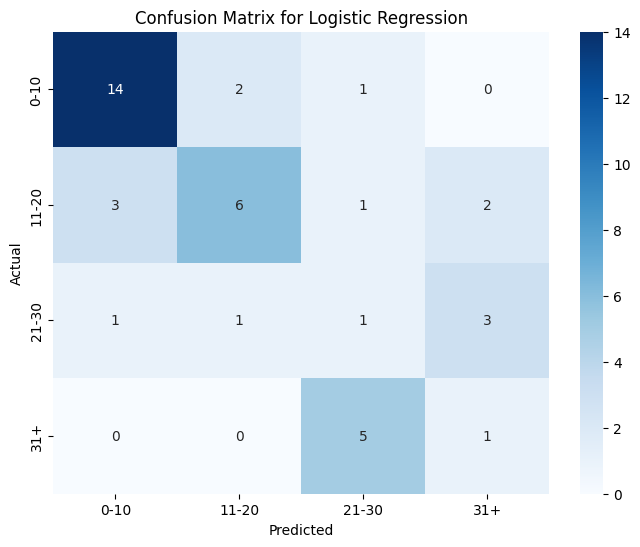

In [60]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix as text
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0-10', '11-20', '21-30', '31+'], yticklabels=['0-10', '11-20', '21-30', '31+'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**The results indicate that classes 2 and 3, corresponding to 21–30 cigarettes per day and more than 31 cigarettes per day, are underrepresented in predictions. This discrepancy is likely due to the imbalanced distribution of data, with these categories having significantly fewer samples than others.**

**Proposed Solution: Addressing Class Imbalance with Data Augmentation**

**To leverage the augmented data effectively, I implemented a fully connected neural network. Neural networks are well-suited for this task as they can generalize better with larger and more balanced datasets.**

In [61]:
# Function to set random seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed
set_seed()

In [62]:
# Function to augment data for minority classes
def augment_data(X, y, target_class, augmentation_factor=2, noise_level=0.01):

    # Filter the samples belonging to the target class
    target_indices = np.where(y == target_class)[0]
    X_target = X[target_indices]
    y_target = y[target_indices]

    # Duplicate samples and add random noise
    augmented_X = []
    augmented_y = []
    for _ in range(augmentation_factor):
        noisy_samples = X_target + np.random.normal(0, noise_level, X_target.shape)
        augmented_X.append(noisy_samples)
        augmented_y.append(y_target)

    # Combine augmented samples
    augmented_X = np.vstack(augmented_X)
    augmented_y = np.hstack(augmented_y)

    return augmented_X, augmented_y

In [63]:
target_mapped = target.map(output_mapping).to_numpy()
features_mapped = features_mapped.to_numpy()

# Augment data for classes 2 and 3
augmented_X_2, augmented_y_2 = augment_data(features_mapped, target_mapped, target_class=2, augmentation_factor=3)
augmented_X_3, augmented_y_3 = augment_data(features_mapped, target_mapped, target_class=3, augmentation_factor=3)

# Combine original and augmented data
X_combined = np.vstack([features_mapped, augmented_X_2, augmented_X_3])
y_combined = np.hstack([target_mapped, augmented_y_2, augmented_y_3])

# Standardize the features
scaler = StandardScaler()
X_combined = scaler.fit_transform(X_combined)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_combined, dtype=torch.float32)
y_tensor = torch.tensor(y_combined, dtype=torch.long)

# Create DataLoader for the entire dataset
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)  # Input to hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)          # Hidden to hidden layer
        self.fc3 = nn.Linear(8, num_classes)  # Hidden to output layer
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.softmax(x)

# Initialize the model, loss function, and optimizer
model = NeuralNet(input_size=X_combined.shape[1], num_classes=4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in data_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}")

# Evaluate on the combined dataset
model.eval()
with torch.no_grad():
    outputs = model(X_tensor)
    _, y_pred = torch.max(outputs, 1)

# Print classification report
print("\nClassification Report:\n", classification_report(y_combined, y_pred.numpy()))

# Calculate total accuracy
total_correct = (y_pred.numpy() == y_combined).sum()
total_accuracy = total_correct / len(y_combined)

print(f"\nTotal Accuracy: {total_accuracy:.4f}")





Epoch 1/100, Loss: 34.7343
Epoch 2/100, Loss: 34.6075
Epoch 3/100, Loss: 34.4669
Epoch 4/100, Loss: 34.3001
Epoch 5/100, Loss: 34.0692
Epoch 6/100, Loss: 33.7197
Epoch 7/100, Loss: 33.2135
Epoch 8/100, Loss: 32.6269
Epoch 9/100, Loss: 32.1685
Epoch 10/100, Loss: 31.8021
Epoch 11/100, Loss: 31.4951
Epoch 12/100, Loss: 31.1998
Epoch 13/100, Loss: 30.9072
Epoch 14/100, Loss: 30.6292
Epoch 15/100, Loss: 30.3810
Epoch 16/100, Loss: 30.1302
Epoch 17/100, Loss: 29.9389
Epoch 18/100, Loss: 29.7208
Epoch 19/100, Loss: 29.5235
Epoch 20/100, Loss: 29.3161
Epoch 21/100, Loss: 29.1356
Epoch 22/100, Loss: 28.9557
Epoch 23/100, Loss: 28.7672
Epoch 24/100, Loss: 28.5821
Epoch 25/100, Loss: 28.4075
Epoch 26/100, Loss: 28.1685
Epoch 27/100, Loss: 27.9549
Epoch 28/100, Loss: 27.7290
Epoch 29/100, Loss: 27.5311
Epoch 30/100, Loss: 27.3318
Epoch 31/100, Loss: 27.1319
Epoch 32/100, Loss: 26.9670
Epoch 33/100, Loss: 26.8126
Epoch 34/100, Loss: 26.5994
Epoch 35/100, Loss: 26.4676
Epoch 36/100, Loss: 26.3370
E

**Results: The fully connected neural network, coupled with data augmentation, achieved an accuracy of 82.46%, significantly outperforming the logistic regression model, which achieved 53.65%. This highlights the advantage of addressing class imbalance and utilizing more complex modeling techniques for this dataset.**

**This analysis demonstrates that addressing class imbalance through data augmentation can significantly enhance predictive performance. While logistic regression is a viable option for simpler tasks, neural networks are more effective in capturing complex patterns in balanced datasets. The comparison underscores the importance of selecting the appropriate modeling approach based on the nature of the problem and dataset characteristics.**

#**We can conclude that personality traits can be a strong indicator of how many cigarettes per day a person smokes**



